# This notebook is for example purposes only. We will show how to download data, make a naive model, produce predictions, and save them in the format covidpredictions.com can recieve them. This is not intended to be used as an accurate prediction of what will happen! 

In [1]:
from matplotlib import pyplot as plt 
%matplotlib inline
import random
import numpy as np
import pandas as pd
import os
import glob
COVID_REPO_PATH = '<base path>'
RELATIVE_TIME_SERIES_DATA_PATH = 'csse_covid_19_data/csse_covid_19_time_series/'
RELATIVE_DAILY_SERIES_DATA_PATH = 'csse_covid_19_data/csse_covid_19_daily_reports/'

# Download the latest data

In [2]:
!git clone https://github.com/CSSEGISandData/COVID-19.git $COVID_REPO_PATH

Cloning into '/Users/francoischaubard/Desktop/blahblah'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17925 (delta 0), reused 2 (delta 0), pack-reused 17918
Receiving objects: 100% (17925/17925), 70.51 MiB | 7.42 MiB/s, done.
Resolving deltas: 100% (9078/9078), done.


In [3]:
print('check to see if valid daily data downloaded')
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_DAILY_SERIES_DATA_PATH)
check_daily=False
for f in glob.glob(DATA_PATH+"*"):
    if f.endswith(".csv"):
#         print(f)
        df = pd.read_csv(f)
        check_daily=True
print('check to see if valid time series data downloaded')
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_TIME_SERIES_DATA_PATH)
check_timeseries=False
for f in glob.glob(DATA_PATH+"*"):
    if f.endswith(".csv"):
#         print(f)
        df = pd.read_csv(f)
        check_timeseries=True
        
if(check_timeseries&check_daily):
    print("downloaded correctly")
else:
    print("please rerun git clone/update command")

check to see if valid daily data downloaded
check to see if valid time series data downloaded
downloaded correctly


# Take a tour of the data

In [37]:
# see the raw daily data file
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_DAILY_SERIES_DATA_PATH)
DATA_PATH = os.path.join(DATA_PATH,"03-19-2020.csv")
df = pd.read_csv(DATA_PATH)


In [5]:
# see the timeseries data grouped by country
DATA_PATH = os.path.join(COVID_REPO_PATH,RELATIVE_TIME_SERIES_DATA_PATH)
DATA_PATH = os.path.join(DATA_PATH,"time_series_covid19_deaths_global.csv")
df = pd.read_csv(DATA_PATH)

df_gb = df.groupby("Country/Region",as_index=True).sum().reset_index()

df_gb

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,6,6,7
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,6,8,10,10,11,15,15,16,17,20
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,25,26,29,31,35,44,58,86,105,130
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,3,3,3,6,8,12,14,15,16,17
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,2,2
5,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,...,9,13,18,19,23,27,28,36,39,43
7,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,...,1,1,1,3,3,3,4,7,7,7
8,Australia,-255.969500,1129.862300,0,0,0,0,0,0,0,...,13,13,14,16,17,18,20,24,28,30
9,Austria,47.516200,14.550100,0,0,0,0,0,0,0,...,49,58,68,86,108,128,146,158,168,186


# Calculate # of Deaths so far per country

In [6]:
country_deaths = []
for country in df_gb["Country/Region"]:
    try:
        country_stats = df_gb.loc[df_gb["Country/Region"] == country]
        dates = country_stats.columns[4:]
        data = country_stats.values[:,4:][0].astype('int')
        country_deaths.append((country,data.max(),data))
#         print("Total deaths so far:", country,data.max())
    except Exception as e:
        print(e)


# Show the plot for the top 20 most effected countries sorted by number of deaths

('Italy', 15362)


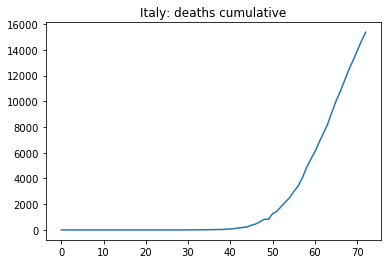

('Spain', 11947)


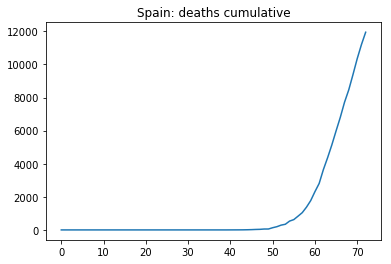

('US', 8407)


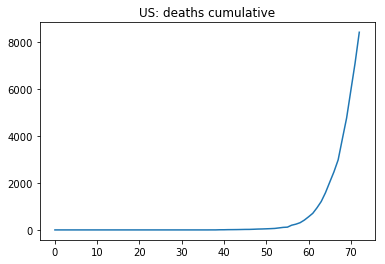

('France', 7574)


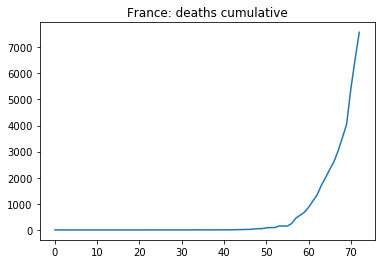

('United Kingdom', 4320)


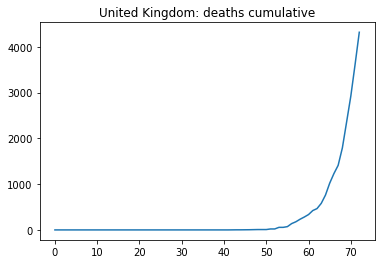

('Iran', 3452)


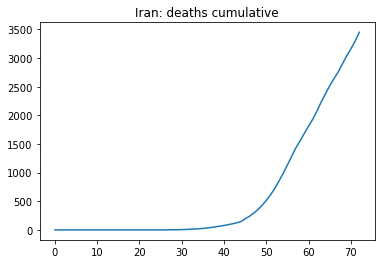

('China', 3330)


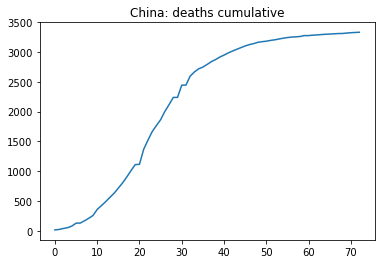

('Netherlands', 1656)


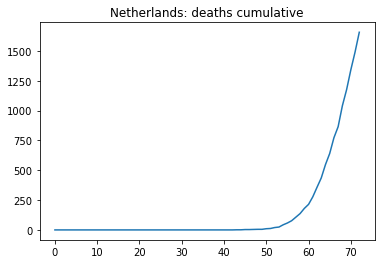

('Germany', 1444)


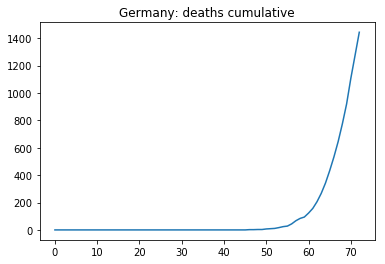

('Belgium', 1283)


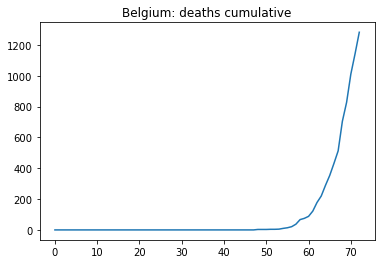

In [38]:
for country,total,curve in sorted(country_deaths, key=lambda x: x[1], reverse=True):
    if total>1000:
        plt.figure()
        print(country,total)
        plt.title(country+": deaths cumulative")
        plt.plot(curve)
        plt.show()

In [8]:
#population dict
population_dict = {'Afghanistan':37172386,
                    'Albania':2866376,
                    'Algeria':42228429,
                    'Andorra':77006,
                    'Angola':30809762,
                    'Antigua and Barbuda':96286,
                    'Arab World':419790588,
                    'Argentina':44494502,
                    'Armenia':2951776,
                    'Aruba':105845,
                    'Australia':24992369,
                    'Austria':8847037,
                    'Azerbaijan':9942334,
                    'Bahamas':385640,
                    'Bahrain':1569439,
                    'Bangladesh':161356039,
                    'Barbados':286641,
                    'Belarus':9485386,
                    'Belgium':11422068,
                    'Belize':383071,
                    'Benin':11485048,
                    'Bermuda':63968,
                    'Bhutan':754394,
                    'Bolivia':11353142,
                    'Bosnia and Herzegovina':3323929,
                    'Botswana':2254126,
                    'Brazil':209469333,
                    'British Virgin Islands':29802,
                    'Brunei':428962,
                    'Bulgaria':7024216,
                    'Burkina Faso':19751535,
                    'Burma':53370000,
                    'Cabo Verde':543767,
                    'Cambodia':16249798,
                    'Cameroon':25216237,
                    'Canada':37058856,
                    'Caribbean small states':7358965,
                    'Cayman Islands':64174,
                    'Central African Republic':4666377,
                    'Central Europe and the Baltics':102511922,
                    'Chad':15477751,
                    'Channel Islands':170499,
                    'Chile':18729160,
                    'China':1392730000,
                    'Colombia':49648685,
                    'Comoros':832322,
                    'Congo (Brazzaville)':84068091,
                    'Congo (Kinshasa)':5244363,
                    'Costa Rica':4999441,
                    'Cote d\'Ivoire':25069229,
                    'Croatia':4089400,
                    'Cuba':11338138,
                    'Curacao':159849,
                    'Cyprus':1189265,
                    'Czechia':10625695,
                    'Denmark':5797446,
                    'Djibouti':958920,
                    'Dominica':71625,
                    'Dominican Republic':10627165,
                    'Early-demographic dividend':3249140605,
                    'East Asia & Pacific':2328220870,
                    'East Asia & Pacific (excluding high income)':2081651801,
                    'East Asia & Pacific (IDA & IBRD countries)':2056064424,
                    'Ecuador':17084357,
                    'Egypt':98423595,
                    'El Salvador':6420744,
                    'Equatorial Guinea':1308974,
                    'Eritrea':4475000,
                    'Estonia':1320884,
                    'Eswatini':1136191,
                    'Ethiopia':109224559,
                    'Euro area':341783171,
                    'European Union':513213363,
                    'Faroe Islands':48497,
                    'Fiji':883483,
                    'Finland':5518050,
                    'France':66987244,
                    'French Polynesia':277679,
                    'Gabon':2119275,
                    'Gambia':2280102,
                    'Georgia':3731000,
                    'Germany':82927922,
                    'Ghana':29767108,
                    'Gibraltar':33718,
                    'Greece':10727668,
                    'Greenland':56025,
                    'Grenada':111454,
                    'Guam':165768,
                    'Guatemala':17247807,
                    'Guinea':12414318,
                    'Guinea-Bissau':1874309,
                    'Guyana':779004,
                    'Haiti':11123176,
                    'Holy See':1000,
                    'Honduras':9587522,
                    'Hong Kong SAR, China':7451000,
                    'Hungary':9768785,
                    'Iceland':353574,
                    'India':1352617328,
                    'Indonesia':267663435,
                    'Iran':81800269,
                    'Iraq':38433600,
                    'Ireland':4853506,
                    'Isle of Man':84077,
                    'Israel':8883800,
                    'Italy':60431283,
                    'Jamaica':2934855,
                    'Japan':126529100,
                    'Jordan':9956011,
                    'Kazakhstan':18276499,
                    'Kenya':51393010,
                    'Kiribati':115847,
                    'Korea, South':25549819,
                    'Korea, Rep.':51635256,
                    'Kosovo':1845300,
                    'Kuwait':4137309,
                    'Kyrgyzstan':6315800,
                    'Laos':7061507,
                    'Latvia':1926542,
                    'Lebanon':6848925,
                    'Lesotho':2108132,
                    'Liberia':4818977,
                    'Libya':6678567,
                    'Liechtenstein':37910,
                    'Lithuania':2789533,
                    'Luxembourg':607728,
                    'Macao SAR, China':631636,
                    'Madagascar':26262368,
                    'Malawi':18143315,
                    'Malaysia':31528585,
                    'Maldives':515696,
                    'Mali':19077690,
                    'Malta':483530,
                    'Marshall Islands':58413,
                    'Mauritania':4403319,
                    'Mauritius':1265303,
                    'Mexico':126190788,
                    'Micronesia, Fed. Sts.':112640,
                    'Moldova':3545883,
                    'Monaco':38682,
                    'Mongolia':3170208,
                    'Montenegro':622345,
                    'Morocco':36029138,
                    'Mozambique':29495962,
                    'Myanmar':53708395,
                    'Namibia':2448255,
                    'Nauru':12704,
                    'Nepal':28087871,
                    'Netherlands':17231017,
                    'New Caledonia':284060,
                    'New Zealand':4885500,
                    'Nicaragua':6465513,
                    'Niger':22442948,
                    'Nigeria':195874740,
                    'North America':364290258,
                    'North Macedonia':2082958,
                    'Northern Mariana Islands':56882,
                    'Norway':5314336,
                    'Oman':4829483,
                    'Pakistan':212215030,
                    'Palau':17907,
                    'Panama':4176873,
                    'Papua New Guinea':8606316,
                    'Paraguay':6956071,
                    'Peru':31989256,
                    'Philippines':106651922,
                    'Poland':37978548,
                    'Portugal':10281762,
                    'Puerto Rico':3195153,
                    'Qatar':2781677,
                    'Romania':19473936,
                    'Russia':144478050,
                    'Rwanda':12301939,
                    'Saint Kitts and Nevis':55000,
                    'Saint Lucia':180000,
                    'Saint Vincent and the Grenadines':110000,
                    'San Marino':33785,
                    'Sao Tome and Principe':211028,
                    'Saudi Arabia':33699947,
                    'Senegal':15854360,
                    'Serbia':6982084,
                    'Seychelles':96762,
                    'Sierra Leone':7650154,
                    'Singapore':5638676,
                    'Sint Maarten (Dutch part)':40654,
                    'Slovakia':5447011,
                    'Slovenia':2067372,
                    'Small states':40575321,
                    'Solomon Islands':652858,
                    'Somalia':15008154,
                    'South Africa':57779622,
                    'South Asia':1814388744,
                    'South Asia (IDA & IBRD)':1814388744,
                    'South Sudan':10975920,
                    'Spain':46723749,
                    'Sri Lanka':21670000,
                    'St. Kitts and Nevis':52441,
                    'St. Lucia':181889,
                    'St. Martin (French part)':37264,
                    'St. Vincent and the Grenadines':110210,
                    'Sub-Saharan Africa':1078306520,
                    'Sudan':41801533,
                    'Suriname':575991,
                    'Sweden':10183175,
                    'Switzerland':8516543,
                    'Syria':16906283,
                    'Taiwan*':23780000,
                    'Tajikistan':9100837,
                    'Tanzania':56318348,
                    'Thailand':69428524,
                    'Timor-Leste':1267972,
                    'Togo':7889094,
                    'Tonga':103197,
                    'Trinidad and Tobago':1389858,
                    'Tunisia':11565204,
                    'Turkey':82319724,
                    'Turkmenistan':5850908,
                    'Turks and Caicos Islands':37665,
                    'Tuvalu':11508,
                    'Uganda':42723139,
                    'Ukraine':44622516,
                    'United Arab Emirates':9630959,
                    'United Kingdom':66488991,
                    'US':327167434,
                    'Uruguay':3449299,
                    'Uzbekistan':32955400,
                    'Vanuatu':292680,
                    'Venezuela':28870195,
                    'Vietnam':95540395,
                    'Virgin Islands (U.S.)':106977,
                    'West Bank and Gaza':4569087,
                    'World':7594270356,
                    'Yemen, Rep.':28498687,
                    'Zambia':17351822,
                    'Zimbabwe':14439018}

# See how many deaths in each country so far with a sigmoid curve fitted to the data

('error:', 0.01, 0.0, 101.11111111111111, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 79.44444444444444, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 115.55555555555556, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 122.77777777777777, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 130.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 108.33333333333334, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is 

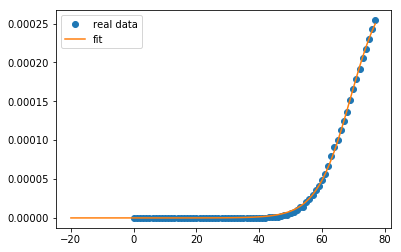

best error 3.7807622881260634e-05


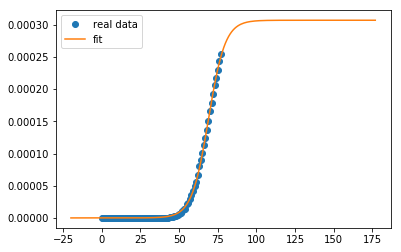

('Italy: predicted dead: ', 18544.86382337539, ' currently at:', 15362.0)


/Users/francoischaubard/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


('error:', 0.01, 0.0, 72.22222222222223, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.01, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 72.22222222222223, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 79.44444444444444, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 86.66666666666667, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.001, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceede

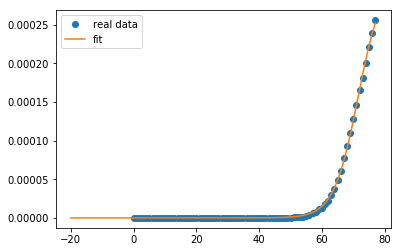

best error 2.744547025021247e-05


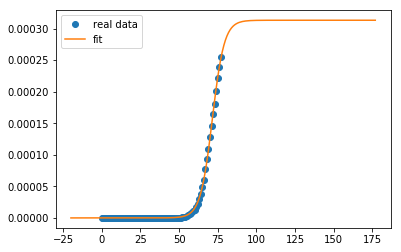

('Spain: predicted dead: ', 14633.93640555446, ' currently at:', 11947.0)
best error 1.7846567789732044e-06


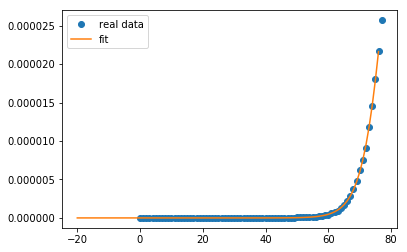

best error 1.7846567789732044e-06


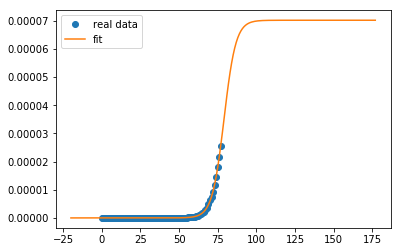

('US: predicted dead: ', 22961.36451795981, ' currently at:', 8407.0)
best error 8.816289671036788e-06


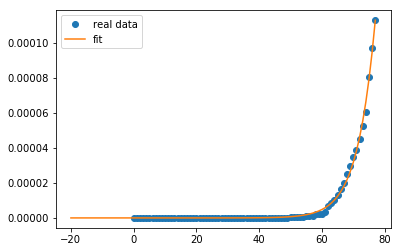

best error 8.816289671036788e-06


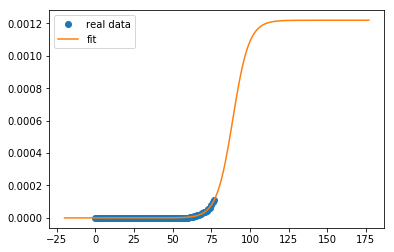

('France: predicted dead: ', 81656.24392935232, ' currently at:', 7574.0)
('error:', 0.0001, 0.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 72.22222222222223, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 79.44444444444444, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 86.66666666666667, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 93.88888888888889, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 108.33333333333334, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
('error:', 0.0001, 0.0, 115.55555555555556, RuntimeError

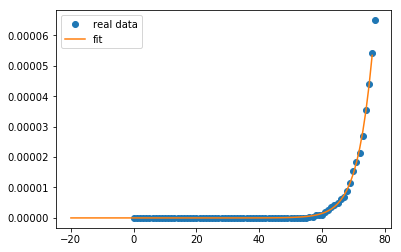

best error 4.420201486319822e-06


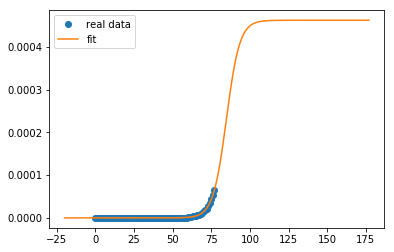

('United Kingdom: predicted dead: ', 30733.474577226865, ' currently at:', 4320.0)
best error 7.61048198611927e-06


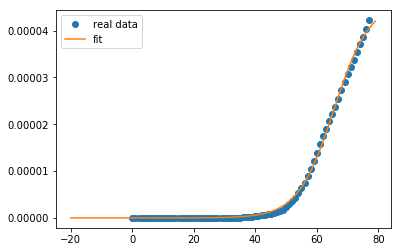

best error 7.61048198611927e-06


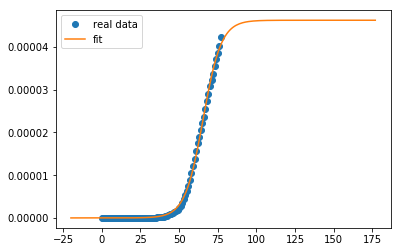

('Iran: predicted dead: ', 3782.1547343620123, ' currently at:', 3452.0)
best error 1.502832188352524e-06


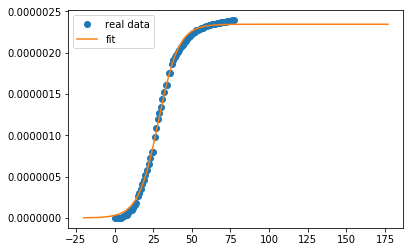

best error 1.502832188352524e-06


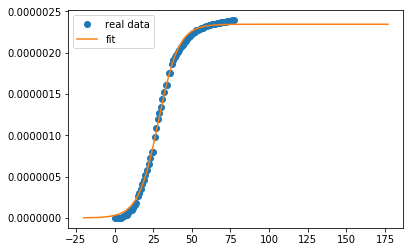

('China: predicted dead: ', 3262.7287019047785, ' currently at:', 3330.0)
('error:', 0.001, 0.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
best error 8.780830033360617e-06


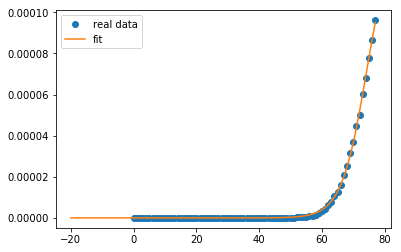

best error 8.780830033360617e-06


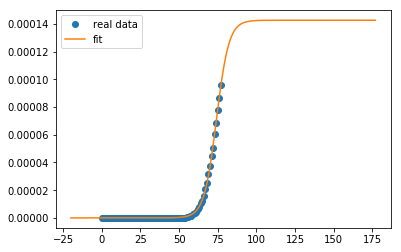

('Netherlands: predicted dead: ', 2458.29451985385, ' currently at:', 1656.0)
best error 1.3680237691359568e-06


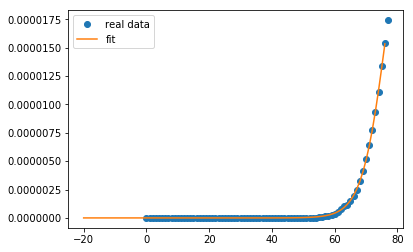

best error 1.3680237691359568e-06


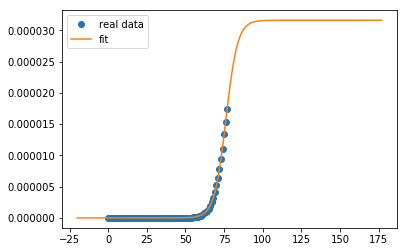

('Germany: predicted dead: ', 2620.996942335373, ' currently at:', 1444.0)


/Users/francoischaubard/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:768: RuntimeWarning: divide by zero encountered in true_divide
  pcov = np.dot(VT.T / s**2, VT)


best error 8.536107471956916e-06


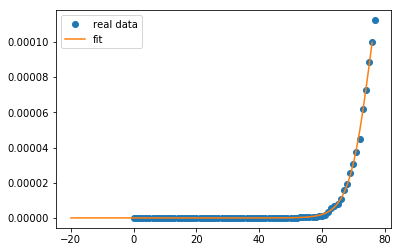

best error 8.536107471956916e-06


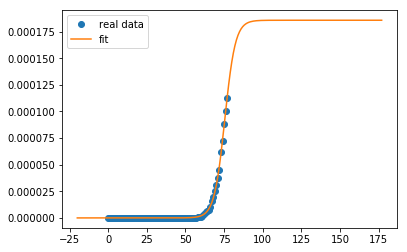

('Belgium: predicted dead: ', 2121.6035321379845, ' currently at:', 1283.0)
('error:', 0.0001, 2.0, 65.0, RuntimeError('Optimal parameters not found: The maximum number of function evaluations is exceeded.',))
best error 7.488521550290262e-06


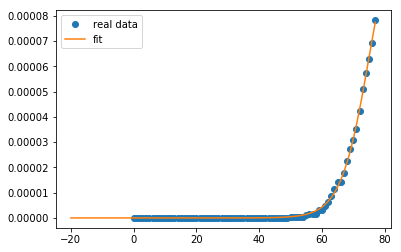

best error 7.488521550290262e-06


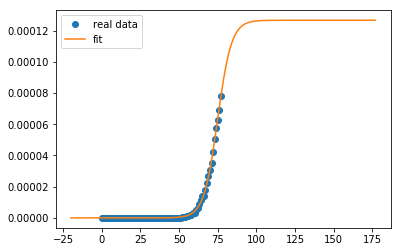

('Switzerland: predicted dead: ', 1078.2148962802867, ' currently at:', 666.0)
best error 4.0519163011157253e-07


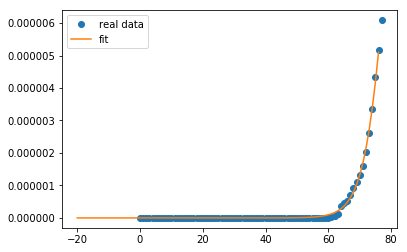

best error 4.0519163011157253e-07


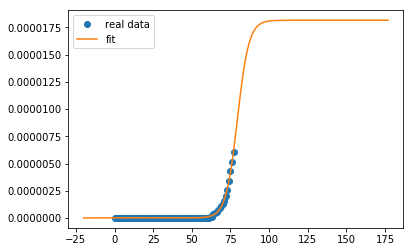

('Turkey: predicted dead: ', 1495.3834515478761, ' currently at:', 501.0)
best error 1.472392393742806e-07


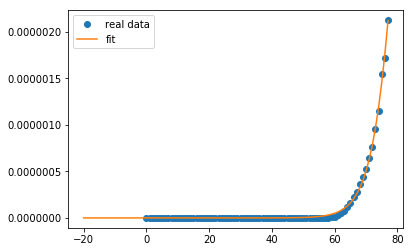

best error 1.472392393742806e-07


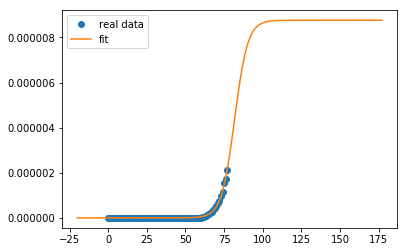

('Brazil: predicted dead: ', 1835.5273801658645, ' currently at:', 445.0)
best error 2.872385086183828e-06


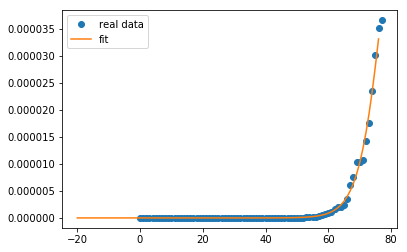

best error 2.872385086183828e-06


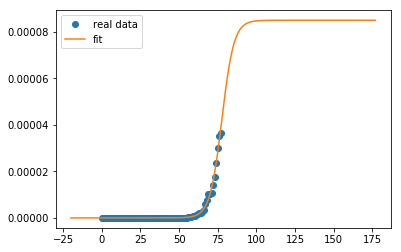

('Sweden: predicted dead: ', 865.7876856991376, ' currently at:', 373.0)
best error 2.175543554950171e-06


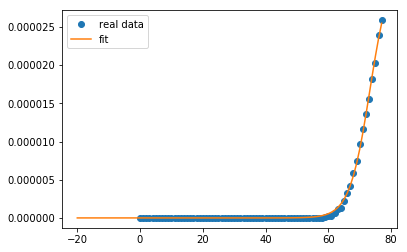

best error 2.175543554950171e-06


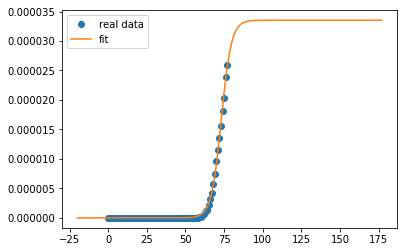

('Portugal: predicted dead: ', 344.6286362630479, ' currently at:', 266.0)
best error 4.2926027551530743e-07


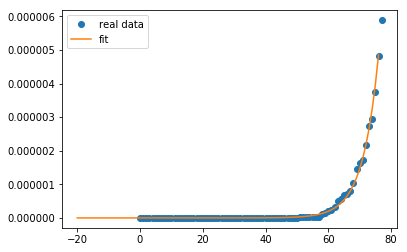

best error 4.2926027551530743e-07


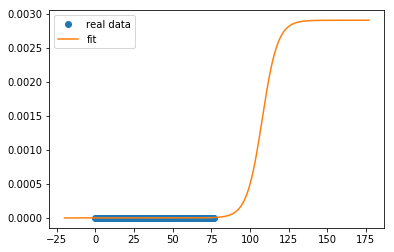

('Canada: predicted dead: ', 107629.94515336702, ' currently at:', 218.0)
best error 8.297930688885267e-08


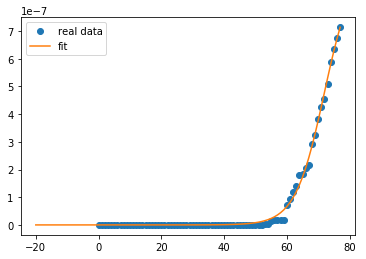

best error 8.297930688885267e-08


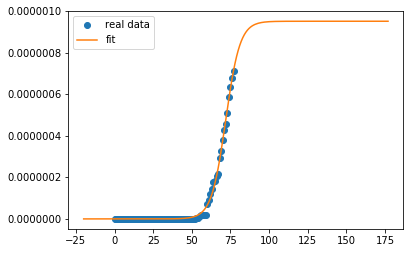

('Indonesia: predicted dead: ', 254.55977506687748, ' currently at:', 191.0)
best error 1.90964916752414e-06


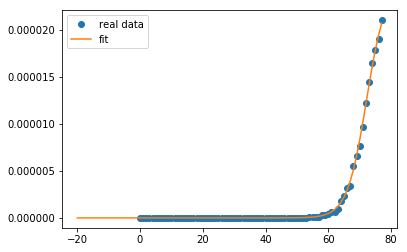

best error 1.90964916752414e-06


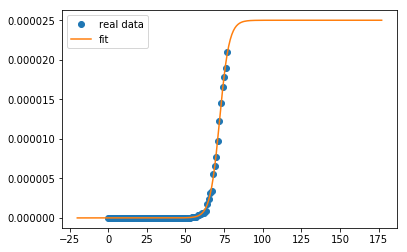

('Austria: predicted dead: ', 221.1040568502903, ' currently at:', 186.0)
best error 1.7375753950392082e-06


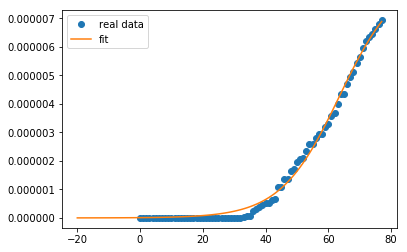

best error 1.7375753950392082e-06


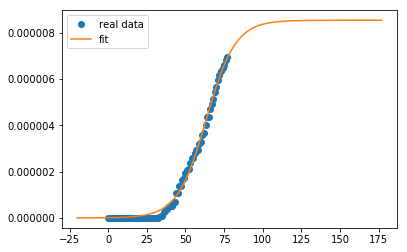

('Korea, South: predicted dead: ', 217.9339225791003, ' currently at:', 177.0)
best error 7.339739906050034e-07


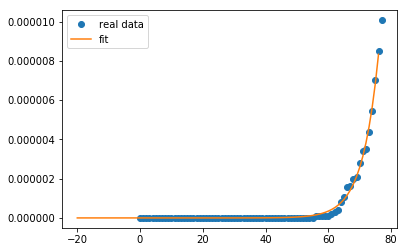

best error 7.339739906050034e-07


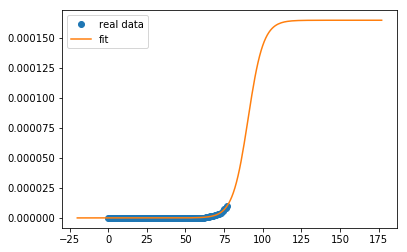

('Ecuador: predicted dead: ', 2813.5744891177205, ' currently at:', 172.0)
best error 2.4262044827470946e-06


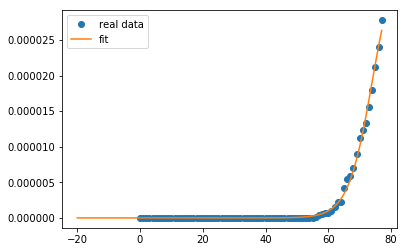

best error 2.4262044827470946e-06


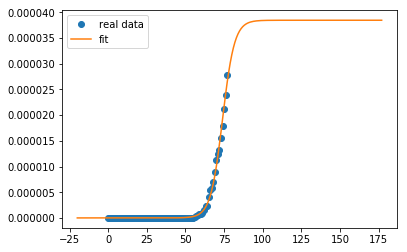

('Denmark: predicted dead: ', 223.03054021531915, ' currently at:', 161.0)
best error 5.405335515878087e-07


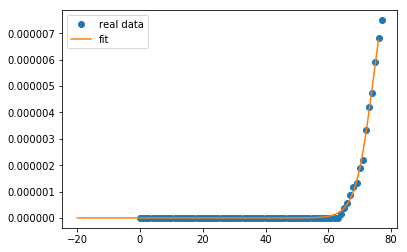

best error 5.405335515878087e-07


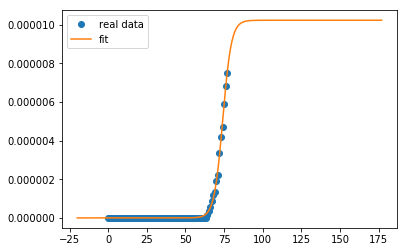

('Romania: predicted dead: ', 199.36773250057297, ' currently at:', 146.0)
best error 1.4557933413964808e-07


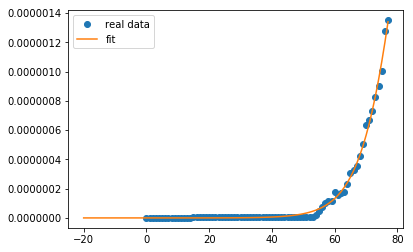

best error 1.4557933413964808e-07


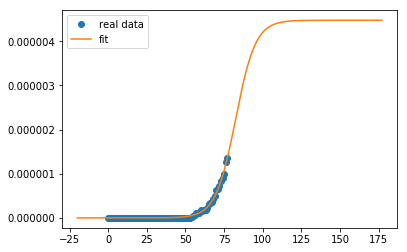

('Philippines: predicted dead: ', 477.49855930255416, ' currently at:', 144.0)
best error 1.9953020612966766e-06


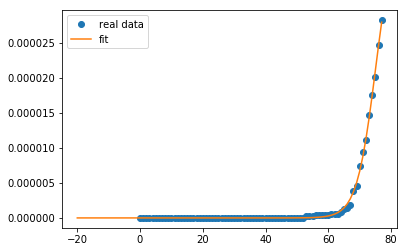

best error 1.9953020612966766e-06


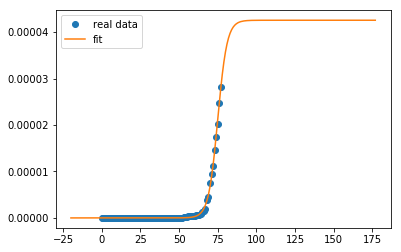

('Ireland: predicted dead: ', 206.45482972117108, ' currently at:', 137.0)
best error 2.1904674692018498e-07


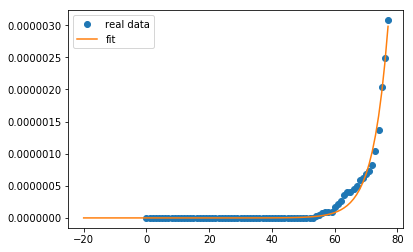

best error 2.1904674692018498e-07


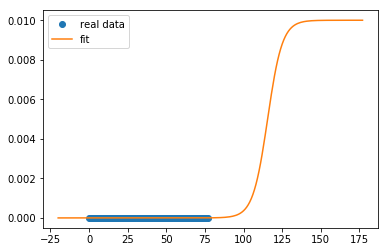

('Algeria: predicted dead: ', 422283.2720822552, ' currently at:', 130.0)


In [9]:
from scipy.optimize import curve_fit
# Since we have the most data on China, lets learn a function and then use it to predict what will happen for other countries with a "draconian" factor of (5-10x or so)
def fsigmoid(x, *params):
    return params[0] * 1.0 / (1.0 + np.exp(-params[1]*(x-params[2])))

def fit_sigmoid(data, plot=True, max_days_to_predict_from_today=40):
    best_error=1.
    offset=20
    best_predictions=None
    data = np.hstack([np.zeros((5)),data])
    days = range(len(data))
    x = range(-offset, len(data)+max_days_to_predict_from_today)
    for p0 in [1e-1,1e-2,1e-3,1e-4,1e-5]:
        for p1 in np.linspace(0,2,20):
            for p2 in np.linspace(65,130,10):
                try:
                    popt,pcov = curve_fit(fsigmoid, days, data, p0=[p0,p1,p2], method='dogbox', bounds=([-10., -10.,-1000.],[10., 10.,1000.]))

                except Exception as e:
                    print("error:",p0,p1,p2,e)
                   
                residuals = data - fsigmoid(days,*popt)
                error = np.sum((np.abs(residuals)/(residuals.size-2)))
                
                if best_error>error:
                    y = fsigmoid(x, *popt)
                    best_error=error
                    best_predictions=y

    if plot:
        print "best error",error
        plt.figure()
        
        plt.plot(days, list(data), 'o', label='real data')
        
        m = np.max(data)
        bb = list(best_predictions[best_predictions<m])
        
        plt.plot(x[:len(bb)], bb, label='fit')
        plt.legend(loc='best')
        plt.show()
        
        print "best error",error
        plt.figure()
        plt.plot(days, list(data), 'o', label='real data')
        plt.plot(x,best_predictions, label='fit')
        plt.legend(loc='best')
        plt.show()
        
    return best_predictions[-max_days_to_predict_from_today:],best_error


for country,total,curve in sorted(country_deaths, key=lambda x: x[1], reverse=True):
    if total>100:
        if country in population_dict:
            population=population_dict[country]
            dates = country_stats.columns[4:]
            country_stats = df_gb.loc[df_gb["Country/Region"] == country]
            data = country_stats.values[:,4:][0].astype('float')/population
            prediction, error = fit_sigmoid(data,plot=True,max_days_to_predict_from_today=100)
            print(country+": predicted dead: ", max(prediction)*population, " currently at:",max(data)*population)
            print("="*50)

# Make a Global Prediction using Naive Curve Fitting to a Sigmoid

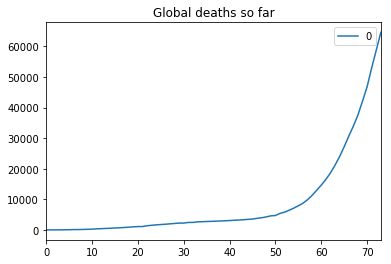

In [11]:
global_stats = df_gb.sum(axis=0)
df_global = global_stats[3:].reset_index()
df_global.plot(title="Global deaths so far")

('Globabl Deaths by', '4/4/20')
best error 1.1238513733038303e-06


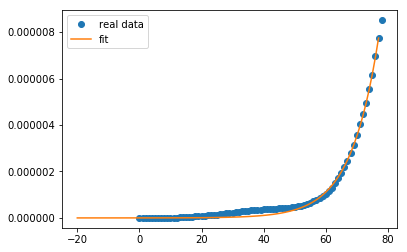

best error 1.1238513733038303e-06


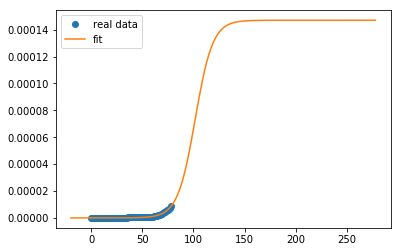

('predicted dead: ', 1116439.5209985657, ' currently at:', 64605.99999999999)
This simple, naive model suggests that 1116439 will die globally in 200 days from 4/4/20
WARNING! THIS IS A VERY NAIVE PREDICTION.


In [12]:
from scipy.optimize import curve_fit
global_stats = df_gb.sum(axis=0)
df_global = global_stats[3:].reset_index()
dates = list(df_global["index"])
global_data = df_global[0]
population=population_dict["World"]
data = global_data.astype('float')/population
print("Globabl Deaths by",dates[-1])
max_days_to_predict_from_today = 200
prediction, error = fit_sigmoid(data,plot=True,max_days_to_predict_from_today=max_days_to_predict_from_today)
print("predicted dead: ", max(prediction)*population, " currently at:",max(data)*population)

print("This simple, naive model suggests that "+str(int(max(prediction)*population)) + " will die globally in "+ str(max_days_to_predict_from_today)+" days from "+str(dates[-1]))
print("WARNING! THIS IS A VERY NAIVE PREDICTION.")


In [32]:
#assume that it will effect each country uniformly as per population
prediction_df = pd.DataFrame(columns=['Date', 'Deaths', 'Place'])
prediction_dates = pd.date_range(start = dates[-1], periods = max_days_to_predict_from_today) 
counter=0
for day in prediction_dates:
    global_prediction = int(prediction[counter]*population_dict["World"])
    date = day.date()
    print "Predicted deaths globally (day,count)",date,global_prediction
    prediction_df = prediction_df.append({'Date': date, 'Deaths': global_prediction, 'Place': "World"}, ignore_index=True)
    for country in list(df_gb["Country/Region"]):
        #check if we have the population for it
        if country in population_dict: 
            population = population_dict[country]
            perc_of_world_population = float(population)/population_dict["World"]
            local_prediction = int(global_prediction*perc_of_world_population)
            # add to prediction_df
            prediction_df = prediction_df.append({'Date': date, 'Deaths': local_prediction, 'Place': country}, ignore_index=True)
    counter+=1


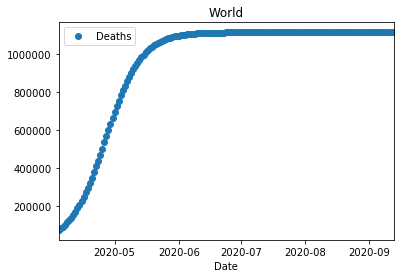

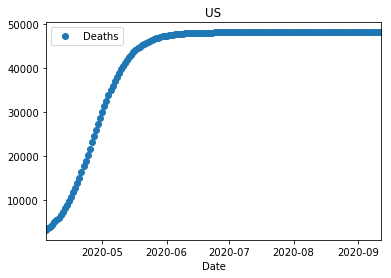

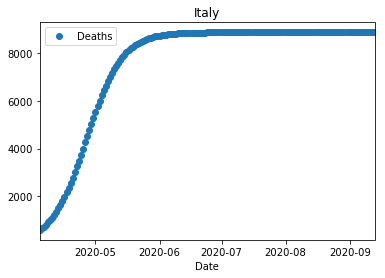

In [15]:
# see your predictions
prediction_df[prediction_df["Place"]=="World"].plot(x='Date', y='Deaths', style='o',title="World")
prediction_df[prediction_df["Place"]=="US"].plot(x='Date', y='Deaths', style='o',title="US")
prediction_df[prediction_df["Place"]=="Italy"].plot(x='Date', y='Deaths', style='o',title="Italy")

# Package our predictions up and submit to covidpredictions.com

In [31]:
submit_df = prediction_df.copy()
submit_df = submit_df.set_index("Place")
submit_df = submit_df.pivot_table(index="Place",columns="Date",values=['Deaths'], aggfunc='first')
submit_df.columns = submit_df.columns.droplevel(level=0)
submit_df.to_csv(os.path.join(COVID_REPO_PATH,"predictions.csv"),index=True)

# Now upload it to covidpredictions.com via the submit form on the website and your predictions will be scored each day starting in 7 days, and if they make the top 10, they will be added to the leaderboard

In [ ]:
############################################
# predictions.csv should be in the format:
############################################
# Place          4/4/20    4/5/20    4/6/20    4/7/20    4/8/20    4/9/20    4/10/20 ... until end of your pred
# Afghanistan    358       399       445       495       550       611       678
# Albania        27        30        34        38        42        47        62
# World          545       676       878       495       550       611       678
# Alabama        27        30        34        38        42        47        62
# Alabama_Autauga 0        0          0         0         3         5         8
